In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('survey_lung_cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [12]:
df.shape

(309, 17)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   AGE                    309 non-null    int64 
 1   SMOKING                309 non-null    int64 
 2   YELLOW_FINGERS         309 non-null    int64 
 3   ANXIETY                309 non-null    int64 
 4   PEER_PRESSURE          309 non-null    int64 
 5   CHRONIC DISEASE        309 non-null    int64 
 6   FATIGUE                309 non-null    int64 
 7   ALLERGY                309 non-null    int64 
 8   WHEEZING               309 non-null    int64 
 9   ALCOHOL CONSUMING      309 non-null    int64 
 10  COUGHING               309 non-null    int64 
 11  SHORTNESS OF BREATH    309 non-null    int64 
 12  SWALLOWING DIFFICULTY  309 non-null    int64 
 13  CHEST PAIN             309 non-null    int64 
 14  LUNG_CANCER            309 non-null    object
 15  FEMALE                 

In [20]:
# Заменим значение целевой переменной на числовые
df.loc[df['LUNG_CANCER']=='YES', 'LUNG_CANCER'] = 1
df.loc[df['LUNG_CANCER']=='NO', 'LUNG_CANCER'] = 0

In [22]:
for col in df.columns:
    print(df[col].value_counts())

64    20
63    19
56    19
62    18
60    17
61    16
59    15
70    15
67    13
58    13
69    11
55    11
72    10
71    10
68     9
57     9
77     9
51     8
54     8
65     7
74     6
75     5
76     4
52     4
53     4
73     4
47     4
66     4
49     3
81     2
78     2
44     2
48     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: AGE, dtype: int64
2    174
1    135
Name: SMOKING, dtype: int64
2    176
1    133
Name: YELLOW_FINGERS, dtype: int64
1    155
2    154
Name: ANXIETY, dtype: int64
2    155
1    154
Name: PEER_PRESSURE, dtype: int64
2    156
1    153
Name: CHRONIC DISEASE, dtype: int64
2    208
1    101
Name: FATIGUE , dtype: int64
2    172
1    137
Name: ALLERGY , dtype: int64
2    172
1    137
Name: WHEEZING, dtype: int64
2    172
1    137
Name: ALCOHOL CONSUMING, dtype: int64
2    179
1    130
Name: COUGHING, dtype: int64
2    198
1    111
Name: SHORTNESS OF BREATH, dtype: int64
1    164
2    145
Name: SWALLOWING DIFFICULTY, dtype: int64
2    172
1  

<AxesSubplot:>

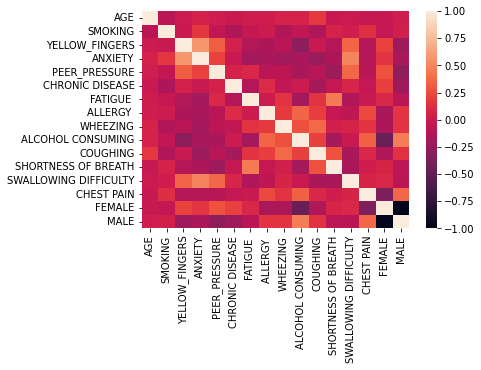

In [25]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='LUNG_CANCER', ylabel='AGE'>

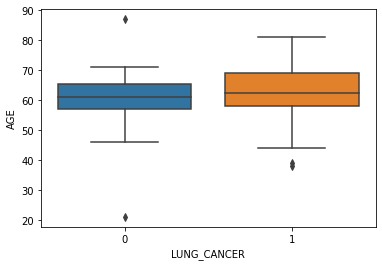

In [34]:
sns.boxplot(data=df, x="LUNG_CANCER", y="AGE")
#Разброс есть, но это не выбросы, лежат в рамках допустимых значений

In [9]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

df['GENDER'] = df["GENDER"].replace({"M": "Male", "F": "Female"})

df = pd.get_dummies(df, columns = ["GENDER"])
df.rename(columns={"GENDER_Male": "MALE", "GENDER_Female": "FEMALE"}, inplace=True)

df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,FEMALE,MALE
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,1,0


In [17]:
df["LUNG_CANCER"].value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

In [62]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].astype("int32", errors = 'ignore')

In [63]:
y = df["LUNG_CANCER"]
X = df.drop(['LUNG_CANCER'], axis=1)

In [64]:
y = y.to_numpy()

In [65]:
type(y)

numpy.ndarray

In [66]:
#Выровняем данные
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
#Размер разбиения подобран вручную

In [118]:
#Не слушала вебинар и не знаю пока, что делает эта команда и куда убирает целевую переменную
#df["LUNG_CANCER"] = LabelEncoder.fit_transform(df["LUNG_CANCER"])

In [119]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gaussian)

92.31


In [120]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

93.59


In [121]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_svc)

96.15


In [122]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_linear_svc)

93.59


In [123]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_perceptron)

92.31


In [124]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
y_pred = decisiontree.predict(X_test)
acc_decisiontree = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_decisiontree)

91.03


In [125]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

94.87


In [126]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_knn)

94.87


In [127]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_sgd)

93.59


In [128]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
y_pred = gbk.predict(X_test)
acc_gbk = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gbk)

91.03


Let's compare the accuracies of each model!

In [129]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,96.15
1,KNN,94.87
3,Random Forest,94.87
2,Logistic Regression,93.59
6,Linear SVC,93.59
8,Stochastic Gradient Descent,93.59
4,Naive Bayes,92.31
5,Perceptron,92.31
7,Decision Tree,91.03
9,Gradient Boosting Classifier,91.03


I decided to use the Support Vector Machines model for the further use.